In [3]:
import os
# –û—Ç–∫–ª—é—á–∞–µ—Ç –≤—Å–µ –ª–æ–≥–∏ TensorFlow (0 - –≤—Å–µ, 1 - –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏—è, 2 - –æ—à–∏–±–∫–∏, 3 - –∫—Ä–∏—Ç–∏—á–Ω—ã–µ –æ—à–∏–±–∫–∏)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [55]:
from sklearn import datasets
import pandas as pd
import numpy as np
from typing import List, Union
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import time  
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, confusion_matrix, accuracy_score, f1_score, r2_score, mean_squared_error, make_scorer
from sklearn.linear_model import LogisticRegression, LinearRegression
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
import xgboost as xgb
from torch.utils.tensorboard import SummaryWriter
import neptune
import optuna
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from datetime import datetime
import shap
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

# –ó–∞–≥—Ä—É–∂–∞–µ–º –Ω–∞—à –¥–∞—Ç–∞—Å–µ—Ç –∏ –ø—Ä–æ–≤–µ—Ä—è–µ–º –µ–≥–æ

In [5]:
df = pd.read_csv('content/ParisHousing.csv')

In [7]:
df

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 3              8  2005           0                  1   
1                 8              6  2015           1                  0   
2                 6              8  2021           0                  0   
3                10              4  2012           0                  1   
4                 3              7  1990           1                  0   
...             ...            ...   ...         ...                ...   
9995              7              6  2009           0                  1   
9996              9              4  1990           0                  1   
9997             10             10  2005           1                  1   
9998              1              3  2010           0                  1   
9999              6             10  1994           1                  0   

      basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0         4313   9005     956               0             7  7559081.5  
1         3653   2436     128               1             2  8085989.5  
2         2937   8852     135               1             9  5574642.1  
3          659   7141     359               0             3  3232561.2  
4         8435   2429     292               1             4  7055052.0  
...        ...    ...     ...             ...           ...        ...  
9995      9311   1698     218               0             4   176425.9  
9996      9061   1742     230               0             0  4448474.0  
9997      8304   7730     345               1             9  8390030.5  
9998      2590   6174     339               1             4  5905107.0  
9999      8485   2024     278               1             6   146708.4  

[10000 rows x 17 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

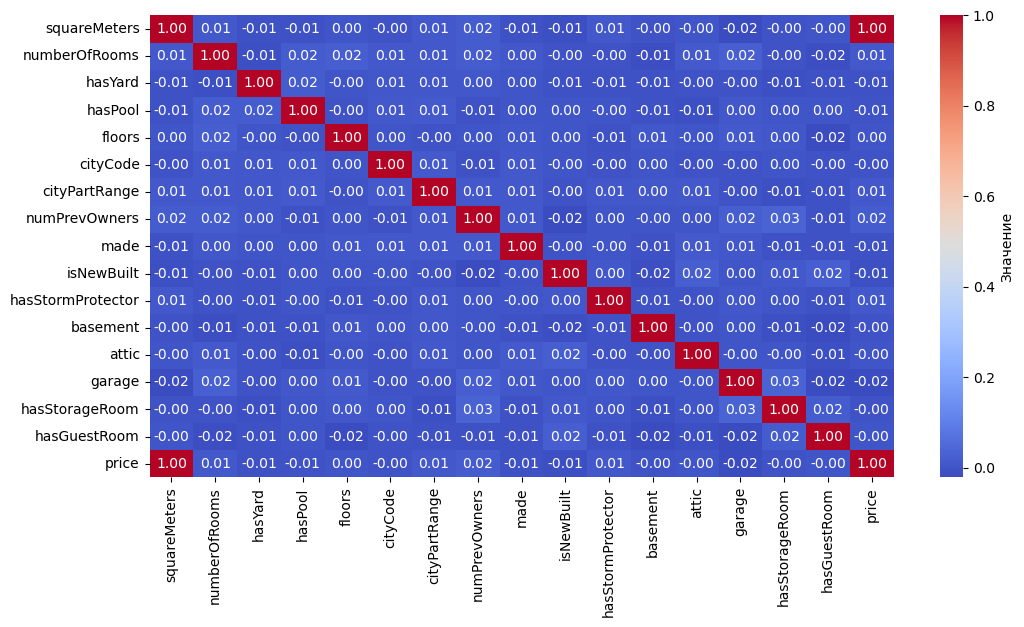

In [9]:
plt.figure(figsize=(12, 6)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': '–ó–Ω–∞—á–µ–Ω–∏–µ'})
plt.show()

In [10]:
df.corr()

squareMeters  numberOfRooms   hasYard   hasPool    floors  \
squareMeters           1.000000       0.009573 -0.006650 -0.005594  0.001109   
numberOfRooms          0.009573       1.000000 -0.011240  0.017015  0.022244   
hasYard               -0.006650      -0.011240  1.000000  0.015514 -0.000883   
hasPool               -0.005594       0.017015  0.015514  1.000000 -0.004006   
floors                 0.001109       0.022244 -0.000883 -0.004006  1.000000   
cityCode              -0.001541       0.009040  0.006760  0.008072  0.002207   
cityPartRange          0.008758       0.008340  0.005023  0.014613 -0.004921   
numPrevOwners          0.016619       0.016766  0.004279 -0.006848  0.002463   
made                  -0.007207       0.003978  0.002214  0.001894  0.005022   
isNewBuilt            -0.010667      -0.002865 -0.008370  0.000188  0.002458   
hasStormProtector      0.007480      -0.001656 -0.007598 -0.001001 -0.008566   
basement              -0.003960      -0.013990 -0.008558 -0.007268  0.006228   
attic                 -0.000588       0.012061 -0.003085 -0.011901 -0.000270   
garage                -0.017246       0.023188 -0.004626  0.004832  0.011303   
hasStorageRoom        -0.003486      -0.004760 -0.009506  0.001238  0.003616   
hasGuestRoom          -0.000623      -0.015529 -0.007276  0.001123 -0.021155   
price                  0.999999       0.009591 -0.006119 -0.005070  0.001654   

                   cityCode  cityPartRange  numPrevOwners      made  \
squareMeters      -0.001541       0.008758       0.016619 -0.007207   
numberOfRooms      0.009040       0.008340       0.016766  0.003978   
hasYard            0.006760       0.005023       0.004279  0.002214   
hasPool            0.008072       0.014613      -0.006848  0.001894   
floors             0.002207      -0.004921       0.002463  0.005022   
cityCode           1.000000       0.011334      -0.007549  0.009266   
cityPartRange      0.011334       1.000000       0.009238  0.007748   
numPrevOwners     -0.007549       0.009238       1.000000  0.006858   
made               0.009266       0.007748       0.006858  1.000000   
isNewBuilt        -0.000224      -0.001874      -0.017420 -0.001678   
hasStormProtector -0.004941       0.005224       0.002522 -0.000645   
basement           0.002652       0.004743      -0.000862 -0.005506   
attic             -0.002019       0.010696       0.000719  0.013773   
garage            -0.002208      -0.001648       0.020268  0.005687   
hasStorageRoom     0.002554      -0.011338       0.031707 -0.007868   
hasGuestRoom      -0.003338      -0.007153      -0.006082 -0.005431   
price             -0.001539       0.008813       0.016619 -0.007210   

                   isNewBuilt  hasStormProtector  basement     attic  \
squareMeters        -0.010667           0.007480 -0.003960 -0.000588   
numberOfRooms       -0.002865          -0.001656 -0.013990  0.012061   
hasYard             -0.008370          -0.007598 -0.008558 -0.003085   
hasPool              0.000188          -0.001001 -0.007268 -0.011901   
floors               0.002458          -0.008566  0.006228 -0.000270   
cityCode            -0.000224          -0.004941  0.002652 -0.002019   
cityPartRange       -0.001874           0.005224  0.004743  0.010696   
numPrevOwners       -0.017420           0.002522 -0.000862  0.000719   
made                -0.001678          -0.000645 -0.005506  0.013773   
isNewBuilt           1.000000           0.003200 -0.015986  0.020127   
hasStormProtector    0.003200           1.000000 -0.005001 -0.003753   
basement            -0.015986          -0.005001  1.000000 -0.003180   
attic                0.020127          -0.003753 -0.003180  1.000000   
garage               0.002749           0.003758  0.000117 -0.000611   
hasStorageRoom       0.007011           0.001401 -0.010815 -0.000789   
hasGuestRoom         0.019895          -0.006549 -0.020732 -0.011995   
price               -0.010643           0.007496 -0.003967 -0.000600   

  

### –ò–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ: –∏—Å–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∑–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –≤—Å–µ—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∫—Ä–æ–º–µ –º–µ—Ç—Ä–∞–∂–∞. –ü–æ–ø—Ä–æ–±—É—é –ø–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –Ω–∞–ø—Ä–∏–º–µ—Ä MI

## –ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ–ª—É—á–∏—Ç—å –≤–∞–∂–Ω–æ—Å—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [11]:
# –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
y = df['price']
X = df.drop(columns=['price'])

In [12]:
# –í—ã—á–∏—Å–ª—è–µ–º MI
mi_scores = mutual_info_regression(X, y)

# –û—Ñ–æ—Ä–º–ª—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ DataFrame
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# –í—ã–≤–æ–¥–∏–º —Ç–æ–ø-10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
print(mi_scores)

squareMeters         6.566493
cityCode             0.026267
numPrevOwners        0.012803
cityPartRange        0.011765
hasYard              0.007757
attic                0.005385
isNewBuilt           0.004287
numberOfRooms        0.004134
floors               0.002443
hasGuestRoom         0.002099
hasStorageRoom       0.000691
hasPool              0.000356
made                 0.000000
hasStormProtector    0.000000
basement             0.000000
garage               0.000000
dtype: float64


### –°–Ω–æ–≤–∞ –≤–∞–∂–Ω–æ—Å—Ç—å –µ—Å—Ç—å —Ç–æ–ª—å–∫–æ —É –º–µ—Ç—Ä–∞–∂–∞. –ü–æ–ø—Ä–æ–±—É–µ–º –µ–≥–æ –∏—Å–∫–ª—é—á–∏—Ç—å

In [13]:
X_prob = df.drop(columns=['price','squareMeters'])

In [14]:
# –í—ã—á–∏—Å–ª—è–µ–º MI
mi_scores = mutual_info_regression(X_prob, y)

# –û—Ñ–æ—Ä–º–ª—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ DataFrame
mi_scores = pd.Series(mi_scores, index=X_prob.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# –í—ã–≤–æ–¥–∏–º —Ç–æ–ø-10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
print(mi_scores)

cityCode             0.026280
numPrevOwners        0.012794
cityPartRange        0.011770
hasYard              0.007757
floors               0.005992
numberOfRooms        0.005842
attic                0.005375
isNewBuilt           0.004327
hasGuestRoom         0.002099
hasStorageRoom       0.000711
hasPool              0.000356
made                 0.000000
hasStormProtector    0.000000
basement             0.000000
garage               0.000000
dtype: float64


### –í–∞–∂–Ω–æ—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤—ã—Ä–∞–≤–Ω—è–ª–∞—Å—å. –ù–æ –¥–∞–∂–µ –¥–æ 0.1 –Ω–µ –ø–æ–¥—Ç—è–Ω—É–ª–∞—Å—å. –ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º —É–¥–∞–ª–µ–Ω–∏–µ –µ—â–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [15]:
X_prob2 = df.drop(columns=['price','hasGuestRoom','squareMeters'])

In [16]:
# –í—ã—á–∏—Å–ª—è–µ–º MI
mi_scores = mutual_info_regression(X_prob2, y)

# –û—Ñ–æ—Ä–º–ª—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ DataFrame
mi_scores = pd.Series(mi_scores, index=X_prob2.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# –í—ã–≤–æ–¥–∏–º —Ç–æ–ø-10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
print(mi_scores)

cityCode             0.026292
numPrevOwners        0.012803
cityPartRange        0.011770
hasYard              0.007757
floors               0.006515
attic                0.005406
numberOfRooms        0.005155
isNewBuilt           0.004307
hasStorageRoom       0.000691
hasPool              0.000356
made                 0.000000
hasStormProtector    0.000000
basement             0.000000
garage               0.000000
dtype: float64


### –í—ã–≤–æ–¥: –¥–∞–ª—å–Ω–µ–π—à–∏–µ —É–¥–∞–ª–µ–Ω–∏—è —Ñ–∏—á–µ–π —ç—Ñ—Ñ–µ–∫—Ç–∞ –Ω–µ –ø—Ä–∏–Ω–æ—Å—è—Ç. –ü–æ—ç—Ç–æ–º—É —É–¥–∞–ª–∏–º —Ñ–∏—á–∏ —Å –Ω—É–ª–µ–≤—ã–µ–º MI, –∞ –æ—Å—Ç–ª—å–∞–Ω—ã–µ –æ–±—ä–µ–¥–∏–Ω–∏–º –≤ –æ–¥–Ω—É —Ñ–∏—á—É.

In [17]:
# –ò—Å–∫–ª—é—á–∞–µ–º –Ω–µ–Ω—É–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–º–∞–ª–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è 0-–µ MI)
drop_columns = ['price', 'made', 'hasStormProtector', 'basement', 'garage']
X_prob3 = df.drop(columns=drop_columns)

# –ü—Ä–∏–º–µ–Ω—è–µ–º PCA –¥–ª—è –æ–¥–Ω–æ–≥–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞
pca = PCA(n_components=1)
quality_index = pca.fit_transform(X_prob3)

# –°–æ–∑–¥–∞—ë–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–π DataFrame —Å –Ω–æ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º
X_final = pd.DataFrame(quality_index, columns=['quality_index'])

# –î–æ–±–∞–≤–ª—è–µ–º —Å—Ç–æ–ª–±—Ü—ã 'hasGuestRoom' –∏ 'squareMeters' –∏–∑ –æ—Å–Ω–æ–≤–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
X_final['hasGuestRoom'] = df['hasGuestRoom']
X_final['squareMeters'] = df['squareMeters']

# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ñ–æ—Ä–º—É –¥–∞–Ω–Ω—ã—Ö
print(X_final.shape)

(10000, 3)


In [18]:
X_final

quality_index  hasGuestRoom  squareMeters
0     -43094.783446             7         75523
1     -13715.766883             2         80771
2     -16250.757340             9         55712
3     -20528.176357             3         32316
4     -14068.401226             4         70429
...             ...           ...           ...
9995   27355.568553             4          1726
9996  -15032.251094             0         44403
9997   27359.078271             9         83841
9998    4738.854559             4         59036
9999  -27093.548620             6          1440

[10000 rows x 3 columns]

## –í–Ω–∞—á–∞–ª–µ –ø—Ä–æ–≤–µ–¥–µ–º —Ç–µ—Å—Ç—ã –¥–ª—è –æ–±—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö —Å–æ –≤—Å–µ–º–∏ —Ñ–∏—á–∞–º–∏

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [23]:
# –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –≤ —Ç–µ–Ω–∑–æ—Ä—ã
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

In [33]:
load_dotenv()

True

In [115]:
run = neptune.init_run(
        project=os.getenv("NEPTUNE_PROJECT"), 
        api_token=os.getenv("NEPTUNE_API_TOKEN"),
        capture_stdout=True,
        capture_stderr=True,
        capture_traceback=True,
        capture_hardware_metrics=True
    ) 

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/saatarko/financescoring/e/FIN-29


In [24]:
class ParisDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = X
        self.y = y  

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –∫–∞–∫ —Ç–µ–Ω–∑–æ—Ä—ã
            return self.X[idx].float(), self.y[idx].float()
        return self.X[idx].float()

# –°–æ–∑–¥–∞—ë–º –¥–∞—Ç–∞—Å–µ—Ç—ã
train_dataset = ParisDataset(X_train_tensor, y_train_tensor)
val_dataset = ParisDataset(X_val_tensor, y_val_tensor)  
test_dataset = ParisDataset(X_test_tensor, y_test_tensor)

## –ü–æ–¥–±–∏—Ä–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –±—É–¥–µ–º —á–µ—Ä–µ–∑ neptuna+optuna +pytorch

In [120]:
def train_model(config, trial):

    results = []  # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Å–ø–∏—Å–∫–∞ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
  
    epochs = 600 

    # –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
    train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config["batch_size"], shuffle=False)
    
    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞
    model = SimpleNN(config["num_layers"], config["layers"], config["dropout"], config["activation"]).to(device)
    optimizer = {
        "Adam": optim.Adam(model.parameters(), lr=config["learning_rate"]),
        "SGD": optim.SGD(model.parameters(), lr=config["learning_rate"]),
        "RMSprop": optim.RMSprop(model.parameters(), lr=config["learning_rate"]),
    }[config["optimizer"]]
    
    # –ò—Å–ø–æ–ª—å–∑—É–µ–º Huber Loss (SmoothL1Loss)
    criterion = nn.SmoothL1Loss()  # Huber Loss
    
    # –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤ Neptune
    run[f'trials/{trial.number}/parameters'] = {
        'learning_rate': config["learning_rate"],
        'batch_size': config["batch_size"],
        'num_layers': config["num_layers"],
        'layers': config["layers"],
        'dropout': config["dropout"],
        'activation': config["activation"],
        'optimizer': config["optimizer"]
    }
    
    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è TensorBoard
    writer = SummaryWriter(log_dir=f'content/logs/{trial.number}')
    
    # –ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏
    patience = 30  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –±–µ–∑ —É–ª—É—á—à–µ–Ω–∏–π –¥–æ –æ—Å—Ç–∞–Ω–æ–≤–∫–∏
    best_val_loss = np.inf
    epochs_no_improve = 0
    best_model_wts = None

    # –°–ø–∏—Å–∫–∏ –¥–ª—è –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏—è –ø–æ—Ç–µ—Ä—å
    train_losses = []
    val_losses = []
    val_mses = []  # –î–ª—è MSE –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏
    val_maes = []  # –î–ª—è MAE –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏

    start_time = time.time()

    for epoch in range(epochs):  # —Ç–µ–ø–µ—Ä—å epochs –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∞
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
    
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()

            # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
            torch.nn.utils.clip_grad_value_(model.parameters(), clip_value=1.0)
    
            optimizer.step()
    
            running_loss += loss.item()

        # –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ—Ç–µ—Ä—å –Ω–∞ TensorBoard
        writer.add_scalar('Loss/train', running_loss / len(train_loader), epoch)
        train_losses.append(running_loss / len(train_loader))

        model.eval()
        val_loss = 0.0
        val_mse = 0.0  # –î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Ö—Ä–∞–Ω–µ–Ω–∏—è MSE
        val_mae = 0.0  # –î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Ö—Ä–∞–Ω–µ–Ω–∏—è MAE
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        
                # –î–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å—á–∏—Ç–∞–µ–º MSE –∏ MAE
                val_mse += mean_squared_error(labels.cpu(), outputs.cpu())
                val_mae += torch.mean(torch.abs(labels.cpu() - outputs.cpu()))
        
        # –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ MSE –∏ MAE –¥–ª—è –≤—Å–µ—Ö –±–∞—Ç—á–µ–π
        val_mse /= len(val_loader)
        val_mae /= len(val_loader)
        val_losses.append(val_loss / len(val_loader))
        
        # –õ–æ–≥–∏—Ä—É–µ–º MSE –∏ MAE –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –≤ Neptune
        run[f'trials/{trial.number}/epoch/{epoch+1}/val_mse'] = val_mse
        run[f'trials/{trial.number}/epoch/{epoch+1}/val_mae'] = val_mae
        
        # print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Val Loss: {val_loss / len(val_loader)}, Val MSE: {val_mse:.4f}, Val MAE: {val_mae:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_model_wts = model.state_dict()
        else:
            epochs_no_improve += 1
        
        if epochs_no_improve >= patience:
            print(f"‚èπÔ∏è Early stopping at epoch {epoch+1}")
            break

    # –í–æ—Å—Å—Ç–∞–Ω–æ–≤–∏–º –ª—É—á—à–∏–µ –≤–µ—Å–∞
    if best_model_wts is not None:
        model.load_state_dict(best_model_wts)
    else:
        print("–ù–µ—Ç –ª—É—á—à–∏—Ö –≤–µ—Å–æ–≤ –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏.")
    
    writer.flush()
    writer.close()

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
    results.append({
        "loss": best_val_loss,
        "optimizer": config["optimizer"],
        "device": device,
        "val_mse": val_mse,
        "val_mae": val_mae,
        "training_time": time.time() - start_time,
        "train_losses": train_losses,
        "val_losses": val_losses
    })
    
    # –õ–æ–≥–∏—Ä—É–µ–º –º–µ—Ç—Ä–∏–∫–∏ –≤ Neptune –ø–æ —ç–ø–æ—Ö–∞–º
    for epoch in range(len(train_losses)):
        run[f"trials/{trial.number}/metrics/train_loss"].log(train_losses[epoch], step=epoch)
        run[f"trials/{trial.number}/metrics/val_loss"].log(val_losses[epoch], step=epoch)
        run[f"trials/{trial.number}/metrics/val_mse"].log(val_mses[epoch], step=epoch)
        run[f"trials/{trial.number}/metrics/val_mae"].log(val_maes[epoch], step=epoch)


    # –í—ã–≤–æ–¥–∏–º –≤—Å–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
    print("\nüìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:")
    for res in results:
        print(f"Loss: {res['loss']} + {res['optimizer']} –Ω–∞ {res['device']} | MSE: {res['val_mse']:.4f} | MAE: {res['val_mae']:.4f} | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: {res['training_time']}")

    # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –º–µ—Ç—Ä–∏–∫—É –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≤ Optuna
    return best_val_loss

In [113]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è Optuna
def objective(trial):
    config = {
        "learning_rate": trial.suggest_categorical("learning_rate", [0.1, 0.01, 0.001]),
        "batch_size": trial.suggest_categorical("batch_size", [32, 64]),
        "num_layers": trial.suggest_int("num_layers", 2, 6),
        "layers": trial.suggest_categorical("layers", [35, 50, 75, 100, 250, 350, 500]),
        "dropout": trial.suggest_float("dropout", 0.1, 0.3),
        "activation": trial.suggest_categorical("activation", ["relu", "leaky_relu"]),
        "optimizer": trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"]),
    }

    # –ü–µ—Ä–µ–¥–∞–µ–º –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏—é –≤ —Ñ—É–Ω–∫—Ü–∏—é –æ–±—É—á–µ–Ω–∏—è
    return train_model(config, trial)

In [116]:
# –ó–∞–ø—É—Å–∫ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ —Å Optuna
study = optuna.create_study(direction="minimize")  # –ú–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ–º –ø–æ—Ç–µ—Ä–∏
study.optimize(objective, n_trials=40)

# –õ–æ–≥–∏—Ä—É–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
best_params = study.best_params
best_mse = study.best_value

run.stop()

print(f"Best parameters: {best_params}")
print(f"Best mse: {best_mse}")

[I 2025-03-25 16:28:30,512] A new study created in memory with name: no-name-81f7d7ef-4b8b-4fe1-a349-d739012c1774
[I 2025-03-25 16:29:49,711] Trial 0 finished with value: 862612.607421875 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 4, 'layers': 50, 'dropout': 0.17283682269675155, 'activation': 'leaky_relu', 'optimizer': 'SGD'}. Best is trial 0 with value: 862612.607421875.


‚èπÔ∏è Early stopping at epoch 254

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 862612.607421875 + SGD –Ω–∞ cuda | MSE: 5265767464.9600 | MAE: 64261.1641 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 79.16737580299377


[I 2025-03-25 16:30:20,305] Trial 1 finished with value: 6399139.1875 and parameters: {'learning_rate': 0.1, 'batch_size': 64, 'num_layers': 4, 'layers': 75, 'dropout': 0.16278628497212644, 'activation': 'leaky_relu', 'optimizer': 'RMSprop'}. Best is trial 0 with value: 862612.607421875.


‚èπÔ∏è Early stopping at epoch 92

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 6399139.1875 + RMSprop –Ω–∞ cuda | MSE: 338600807628.8000 | MAE: 445693.1875 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 30.57328486442566


[I 2025-03-25 16:31:36,361] Trial 2 finished with value: 1357004.91015625 and parameters: {'learning_rate': 0.001, 'batch_size': 32, 'num_layers': 3, 'layers': 500, 'dropout': 0.11227971898360732, 'activation': 'relu', 'optimizer': 'SGD'}. Best is trial 0 with value: 862612.607421875.


‚èπÔ∏è Early stopping at epoch 138

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 1357004.91015625 + SGD –Ω–∞ cuda | MSE: 1601983157.7600 | MAE: 31605.2656 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 76.03120350837708


[I 2025-03-25 16:31:48,976] Trial 3 finished with value: 41185871.0 and parameters: {'learning_rate': 0.1, 'batch_size': 64, 'num_layers': 5, 'layers': 50, 'dropout': 0.23475814549914267, 'activation': 'leaky_relu', 'optimizer': 'SGD'}. Best is trial 0 with value: 862612.607421875.


‚èπÔ∏è Early stopping at epoch 32

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 41185871.0 + SGD –Ω–∞ cuda | MSE: 10160990846976.0000 | MAE: 2788103.7500 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 12.590619325637817


[I 2025-03-25 16:32:21,002] Trial 4 finished with value: 984013.00390625 and parameters: {'learning_rate': 0.01, 'batch_size': 64, 'num_layers': 3, 'layers': 75, 'dropout': 0.29775005444745184, 'activation': 'relu', 'optimizer': 'SGD'}. Best is trial 0 with value: 862612.607421875.


‚èπÔ∏è Early stopping at epoch 110

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 984013.00390625 + SGD –Ω–∞ cuda | MSE: 5635179130.8800 | MAE: 60465.5469 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 32.00939083099365


[I 2025-03-25 16:32:51,979] Trial 5 finished with value: 26641488.96875 and parameters: {'learning_rate': 0.1, 'batch_size': 32, 'num_layers': 5, 'layers': 250, 'dropout': 0.19190772763665118, 'activation': 'leaky_relu', 'optimizer': 'SGD'}. Best is trial 0 with value: 862612.607421875.


‚èπÔ∏è Early stopping at epoch 44

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 26641488.96875 + SGD –Ω–∞ cuda | MSE: 5768233475274713088.0000 | MAE: 76637888.0000 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 30.952025175094604


[I 2025-03-25 16:33:44,126] Trial 6 finished with value: 3526322.1328125 and parameters: {'learning_rate': 0.01, 'batch_size': 32, 'num_layers': 4, 'layers': 100, 'dropout': 0.14122060938621483, 'activation': 'relu', 'optimizer': 'RMSprop'}. Best is trial 0 with value: 862612.607421875.


‚èπÔ∏è Early stopping at epoch 78

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 3526322.1328125 + RMSprop –Ω–∞ cuda | MSE: 150872331223.0400 | MAE: 340457.6875 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 52.116517543792725


[I 2025-03-25 16:34:17,756] Trial 7 finished with value: 3840847.03515625 and parameters: {'learning_rate': 0.01, 'batch_size': 32, 'num_layers': 4, 'layers': 100, 'dropout': 0.11042205088914046, 'activation': 'relu', 'optimizer': 'Adam'}. Best is trial 0 with value: 862612.607421875.


‚èπÔ∏è Early stopping at epoch 50

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 3840847.03515625 + Adam –Ω–∞ cuda | MSE: 31109247406.0800 | MAE: 152411.2812 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 33.60402822494507


[I 2025-03-25 16:35:23,509] Trial 8 finished with value: 984402.71484375 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 5, 'layers': 350, 'dropout': 0.24560268013429462, 'activation': 'leaky_relu', 'optimizer': 'Adam'}. Best is trial 0 with value: 862612.607421875.


‚èπÔ∏è Early stopping at epoch 168

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 984402.71484375 + Adam –Ω–∞ cuda | MSE: 8857009070.0800 | MAE: 77323.3828 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 65.72274661064148


[I 2025-03-25 16:36:09,737] Trial 9 finished with value: 505589.54296875 and parameters: {'learning_rate': 0.01, 'batch_size': 64, 'num_layers': 2, 'layers': 250, 'dropout': 0.12098281754351181, 'activation': 'relu', 'optimizer': 'RMSprop'}. Best is trial 9 with value: 505589.54296875.


‚èπÔ∏è Early stopping at epoch 130

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 505589.54296875 + RMSprop –Ω–∞ cuda | MSE: 1372631552.0000 | MAE: 29620.0332 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 46.20758843421936


[I 2025-03-25 16:36:54,380] Trial 10 finished with value: 540683.63671875 and parameters: {'learning_rate': 0.01, 'batch_size': 64, 'num_layers': 2, 'layers': 250, 'dropout': 0.2279671097085171, 'activation': 'relu', 'optimizer': 'RMSprop'}. Best is trial 9 with value: 505589.54296875.


‚èπÔ∏è Early stopping at epoch 147

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 540683.63671875 + RMSprop –Ω–∞ cuda | MSE: 1833092423.6800 | MAE: 35419.6289 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 44.607749462127686


[I 2025-03-25 16:37:20,585] Trial 11 finished with value: 636166.3046875 and parameters: {'learning_rate': 0.01, 'batch_size': 64, 'num_layers': 2, 'layers': 250, 'dropout': 0.22613309633617867, 'activation': 'relu', 'optimizer': 'RMSprop'}. Best is trial 9 with value: 505589.54296875.


‚èπÔ∏è Early stopping at epoch 100

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 636166.3046875 + RMSprop –Ω–∞ cuda | MSE: 1704139642.8800 | MAE: 33029.2969 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 26.174389600753784


[I 2025-03-25 16:38:01,319] Trial 12 finished with value: 1916542.1484375 and parameters: {'learning_rate': 0.01, 'batch_size': 64, 'num_layers': 2, 'layers': 35, 'dropout': 0.2653851944619029, 'activation': 'relu', 'optimizer': 'RMSprop'}. Best is trial 9 with value: 505589.54296875.


‚èπÔ∏è Early stopping at epoch 148

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 1916542.1484375 + RMSprop –Ω–∞ cuda | MSE: 16750113710.0800 | MAE: 117249.4375 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 40.69993233680725


[I 2025-03-25 16:38:30,500] Trial 13 finished with value: 667088.20703125 and parameters: {'learning_rate': 0.01, 'batch_size': 64, 'num_layers': 2, 'layers': 250, 'dropout': 0.20436008094825103, 'activation': 'relu', 'optimizer': 'RMSprop'}. Best is trial 9 with value: 505589.54296875.


‚èπÔ∏è Early stopping at epoch 101

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 667088.20703125 + RMSprop –Ω–∞ cuda | MSE: 2475509923.8400 | MAE: 39895.9258 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 29.156571626663208


[I 2025-03-25 16:38:51,316] Trial 14 finished with value: 1471735.8125 and parameters: {'learning_rate': 0.01, 'batch_size': 64, 'num_layers': 3, 'layers': 250, 'dropout': 0.13998456748748153, 'activation': 'relu', 'optimizer': 'RMSprop'}. Best is trial 9 with value: 505589.54296875.


‚èπÔ∏è Early stopping at epoch 69

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 1471735.8125 + RMSprop –Ω–∞ cuda | MSE: 15570860318.7200 | MAE: 100163.8828 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 20.789785861968994


[I 2025-03-25 16:40:40,482] Trial 15 finished with value: 4576084.671875 and parameters: {'learning_rate': 0.01, 'batch_size': 64, 'num_layers': 6, 'layers': 250, 'dropout': 0.2019382951266926, 'activation': 'relu', 'optimizer': 'RMSprop'}. Best is trial 9 with value: 505589.54296875.


‚èπÔ∏è Early stopping at epoch 228

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 4576084.671875 + RMSprop –Ω–∞ cuda | MSE: 95933891051.5200 | MAE: 245828.1406 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 109.13792014122009


[I 2025-03-25 16:41:29,964] Trial 16 finished with value: 1612573.59375 and parameters: {'learning_rate': 0.01, 'batch_size': 64, 'num_layers': 2, 'layers': 35, 'dropout': 0.27289566091988987, 'activation': 'relu', 'optimizer': 'Adam'}. Best is trial 9 with value: 505589.54296875.


‚èπÔ∏è Early stopping at epoch 178

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 1612573.59375 + Adam –Ω–∞ cuda | MSE: 20538523525.1200 | MAE: 124327.5391 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 49.45841932296753


[I 2025-03-25 16:42:04,364] Trial 17 finished with value: 3117872.8046875 and parameters: {'learning_rate': 0.01, 'batch_size': 64, 'num_layers': 3, 'layers': 500, 'dropout': 0.14678525088268463, 'activation': 'relu', 'optimizer': 'RMSprop'}. Best is trial 9 with value: 505589.54296875.


‚èπÔ∏è Early stopping at epoch 104

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 3117872.8046875 + RMSprop –Ω–∞ cuda | MSE: 65289534341.1200 | MAE: 211065.5938 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 34.35819983482361


[I 2025-03-25 16:42:45,061] Trial 18 finished with value: 5865319.3046875 and parameters: {'learning_rate': 0.1, 'batch_size': 32, 'num_layers': 2, 'layers': 350, 'dropout': 0.22458789865971407, 'activation': 'relu', 'optimizer': 'RMSprop'}. Best is trial 9 with value: 505589.54296875.


‚èπÔ∏è Early stopping at epoch 83

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 5865319.3046875 + RMSprop –Ω–∞ cuda | MSE: 85769305948.1600 | MAE: 241863.9219 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 40.653541564941406


[I 2025-03-25 16:44:06,519] Trial 19 finished with value: 509351.05078125 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 3, 'layers': 250, 'dropout': 0.10105235258145016, 'activation': 'relu', 'optimizer': 'RMSprop'}. Best is trial 9 with value: 505589.54296875.


‚èπÔ∏è Early stopping at epoch 248

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 509351.05078125 + RMSprop –Ω–∞ cuda | MSE: 1177902986.2400 | MAE: 27959.0430 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 81.42795014381409


[I 2025-03-25 16:45:44,049] Trial 20 finished with value: 458824.8984375 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 3, 'layers': 250, 'dropout': 0.10439348664601776, 'activation': 'relu', 'optimizer': 'Adam'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 311

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 458824.8984375 + Adam –Ω–∞ cuda | MSE: 2300495257.6000 | MAE: 41418.4297 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 97.4844434261322


[I 2025-03-25 16:46:45,650] Trial 21 finished with value: 520949.671875 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 3, 'layers': 250, 'dropout': 0.10264411280136862, 'activation': 'relu', 'optimizer': 'Adam'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 195

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 520949.671875 + Adam –Ω–∞ cuda | MSE: 1743434900.4800 | MAE: 37664.8320 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 61.56773805618286


[I 2025-03-25 16:47:56,184] Trial 22 finished with value: 506454.220703125 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 3, 'layers': 250, 'dropout': 0.12335627155365719, 'activation': 'relu', 'optimizer': 'Adam'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 207

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 506454.220703125 + Adam –Ω–∞ cuda | MSE: 1912631818.2400 | MAE: 37792.8164 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 70.49672055244446


[I 2025-03-25 16:48:59,432] Trial 23 finished with value: 605227.7734375 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 3, 'layers': 250, 'dropout': 0.12481270811455965, 'activation': 'relu', 'optimizer': 'Adam'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 171

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 605227.7734375 + Adam –Ω–∞ cuda | MSE: 2178019051.5200 | MAE: 35584.9219 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 63.21474647521973


[I 2025-03-25 16:50:17,496] Trial 24 finished with value: 562475.9296875 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 3, 'layers': 250, 'dropout': 0.12695735423382762, 'activation': 'relu', 'optimizer': 'Adam'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 210

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 562475.9296875 + Adam –Ω–∞ cuda | MSE: 941682542.0800 | MAE: 23824.8730 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 78.02769422531128


[I 2025-03-25 16:54:42,287] Trial 25 finished with value: 558966.15625 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 2, 'layers': 250, 'dropout': 0.12565046699013124, 'activation': 'relu', 'optimizer': 'Adam'}. Best is trial 20 with value: 458824.8984375.



üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 558966.15625 + Adam –Ω–∞ cuda | MSE: 852498854.4000 | MAE: 23671.7344 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 264.75958228111267
[neptune] [error  ] Unexpected error occurred in Neptune background thread: Killing Neptune asynchronous thread. All data is safe on disk and can be later synced manually using `neptune sync` command.


Exception in thread NeptuneAsyncOpProcessor:
Traceback (most recent call last):
  File "/home/saatarko/.conda/envs/HomeworkDS/lib/python3.12/site-packages/neptune/internal/backends/swagger_client_wrapper.py", line 111, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
                                     ^^^^^^^^^^^^^^^^^
  File "/home/saatarko/.conda/envs/HomeworkDS/lib/python3.12/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/saatarko/.conda/envs/HomeworkDS/lib/python3.12/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/saatarko/.conda/envs/HomeworkDS/lib/python3.12/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/saatarko/.cond

‚èπÔ∏è Early stopping at epoch 207

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 2045344.85546875 + Adam –Ω–∞ cuda | MSE: 3774764856.3200 | MAE: 57338.0781 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 144.9148886203766


[I 2025-03-25 17:00:14,991] Trial 27 finished with value: 6052068.578125 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 2, 'layers': 35, 'dropout': 0.153359828101103, 'activation': 'relu', 'optimizer': 'Adam'}. Best is trial 20 with value: 458824.8984375.



üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 6052068.578125 + Adam –Ω–∞ cuda | MSE: 86843423784.9600 | MAE: 242083.2812 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 187.7211630344391


[I 2025-03-25 17:01:31,797] Trial 28 finished with value: 753197.22265625 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 4, 'layers': 350, 'dropout': 0.12467646705450536, 'activation': 'relu', 'optimizer': 'Adam'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 184

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 753197.22265625 + Adam –Ω–∞ cuda | MSE: 3404113745.9200 | MAE: 46405.6797 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 76.76473498344421


[I 2025-03-25 17:02:34,852] Trial 29 finished with value: 547547.90234375 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 3, 'layers': 500, 'dropout': 0.18685692535249196, 'activation': 'leaky_relu', 'optimizer': 'Adam'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 161

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 547547.90234375 + Adam –Ω–∞ cuda | MSE: 1533227627.5200 | MAE: 31199.2773 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 63.00701856613159


[I 2025-03-25 17:04:47,877] Trial 30 finished with value: 710169.765625 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 4, 'layers': 100, 'dropout': 0.16183383571063736, 'activation': 'relu', 'optimizer': 'Adam'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 315

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 710169.765625 + Adam –Ω–∞ cuda | MSE: 3096180490.2400 | MAE: 45728.7617 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 132.98734307289124


[I 2025-03-25 17:05:58,371] Trial 31 finished with value: 641922.65625 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 3, 'layers': 250, 'dropout': 0.1019378408740372, 'activation': 'relu', 'optimizer': 'RMSprop'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 188

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 641922.65625 + RMSprop –Ω–∞ cuda | MSE: 2052243845.1200 | MAE: 37770.5898 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 70.46175718307495


[I 2025-03-25 17:08:09,746] Trial 32 finished with value: 665585.91015625 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 4, 'layers': 75, 'dropout': 0.11500888075481162, 'activation': 'relu', 'optimizer': 'RMSprop'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 268

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 665585.91015625 + RMSprop –Ω–∞ cuda | MSE: 2323993794.5600 | MAE: 40051.4023 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 131.33717823028564


[I 2025-03-25 17:09:09,378] Trial 33 finished with value: 710522.3359375 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 3, 'layers': 250, 'dropout': 0.13416403739559693, 'activation': 'relu', 'optimizer': 'SGD'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 168

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 710522.3359375 + SGD –Ω–∞ cuda | MSE: 2869399255.0400 | MAE: 44773.9297 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 59.59305739402771


[I 2025-03-25 17:09:40,284] Trial 34 finished with value: 960347.4453125 and parameters: {'learning_rate': 0.1, 'batch_size': 64, 'num_layers': 2, 'layers': 50, 'dropout': 0.11256064949294772, 'activation': 'leaky_relu', 'optimizer': 'RMSprop'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 92

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 960347.4453125 + RMSprop –Ω–∞ cuda | MSE: 13286827581.4400 | MAE: 101515.5625 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 30.873108625411987


[I 2025-03-25 17:11:09,674] Trial 35 finished with value: 553317.244140625 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 3, 'layers': 250, 'dropout': 0.11554708849493926, 'activation': 'relu', 'optimizer': 'SGD'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 259

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 553317.244140625 + SGD –Ω–∞ cuda | MSE: 834216565.7600 | MAE: 22923.3477 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 89.35342502593994


[I 2025-03-25 17:11:40,029] Trial 36 finished with value: 9584266.2734375 and parameters: {'learning_rate': 0.1, 'batch_size': 32, 'num_layers': 4, 'layers': 75, 'dropout': 0.10050880721187481, 'activation': 'relu', 'optimizer': 'Adam'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 42

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 9584266.2734375 + Adam –Ω–∞ cuda | MSE: 682184581447.6801 | MAE: 710779.7500 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 30.316549062728882


[I 2025-03-25 17:12:50,453] Trial 37 finished with value: 658315.4140625 and parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 3, 'layers': 250, 'dropout': 0.15304621514402336, 'activation': 'leaky_relu', 'optimizer': 'RMSprop'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 199

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 658315.4140625 + RMSprop –Ω–∞ cuda | MSE: 5540536862.7200 | MAE: 66319.6719 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 70.38879561424255


[I 2025-03-25 17:14:20,652] Trial 38 finished with value: 2503601.45703125 and parameters: {'learning_rate': 0.001, 'batch_size': 32, 'num_layers': 5, 'layers': 250, 'dropout': 0.1357492818548793, 'activation': 'relu', 'optimizer': 'SGD'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 115

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 2503601.45703125 + SGD –Ω–∞ cuda | MSE: 79420023275.5200 | MAE: 241421.8438 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 90.1683440208435


[I 2025-03-25 17:14:37,274] Trial 39 finished with value: 19064196.8125 and parameters: {'learning_rate': 0.1, 'batch_size': 64, 'num_layers': 6, 'layers': 500, 'dropout': 0.16795108780741796, 'activation': 'relu', 'optimizer': 'Adam'}. Best is trial 20 with value: 458824.8984375.


‚èπÔ∏è Early stopping at epoch 31

üìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
Loss: 19064196.8125 + Adam –Ω–∞ cuda | MSE: 4942402913566.7197 | MAE: 1897148.5000 | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: 16.57380509376526
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/saatarko/financescoring/e/FIN-29/metadata
Best parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 3, 'layers': 250, 'dropout': 0.10439348664601776, 'activation': 'relu', 'optimizer': 'Adam'}


NameError: name 'best_mse' is not defined

In [117]:
best_mse = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best mse: {best_mse}")

Best parameters: {'learning_rate': 0.001, 'batch_size': 64, 'num_layers': 3, 'layers': 250, 'dropout': 0.10439348664601776, 'activation': 'relu', 'optimizer': 'Adam'}
Best mse: 458824.8984375


In [121]:
# –ü–æ–ª—É—á–∏–º –¥–∞–Ω–Ω—ã–µ –∏–∑ Optuna
best_params = study.best_params
best_lr = best_params['learning_rate']
best_batch_size = best_params['batch_size']
best_dropout = best_params['dropout']
best_activation = best_params['activation']
best_optimizer = best_params['optimizer']
best_num_layers = best_params['num_layers']
best_layers = best_params['layers']

In [123]:
print(f"best_lr {best_lr}")
print(f"best_batch_size {best_batch_size}") 
print(f"best_dropout {best_dropout}") 
print(f"best_activation {best_activation}") 
print(f"best_num_layers {best_num_layers}") 
print(f"best_optimizer {best_optimizer}")
print(f"best_layers {best_layers}")

best_lr 0.001
best_batch_size 64
best_dropout 0.10439348664601776
best_activation relu
best_num_layers 3
best_optimizer Adam
best_layers 250


### –í—ã–≤–æ–¥: –ú—ã –ø–æ–ª—É—á–∏–ª–∏ –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏ –ø–æ—Å—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª—å –Ω–∞ –æ–±—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —ç—Ç–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö

In [29]:
# === 1. –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã ===
best_config = {
    "learning_rate": 0.001,
    "batch_size": 64,
    "dropout": 0.1044,  # –æ–∫—Ä—É–≥–ª—è–µ–º –¥–æ 4 –∑–Ω–∞–∫–æ–≤
    "activation": "relu",
    "num_layers": 3,
    "optimizer": "Adam",
    "layers": 250
}

# === 2. –û–ø—Ä–µ–¥–µ–ª—è–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ ===
device = "cuda" if torch.cuda.is_available() else "cpu"

# === 3. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö ===
train_loader = DataLoader(train_dataset, batch_size=best_config["batch_size"], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_config["batch_size"], shuffle=False)

# === 4. –û–ø—Ä–µ–¥–µ–ª—è–µ–º –º–æ–¥–µ–ª—å ===
class SimpleNN(nn.Module):
    def __init__(self, num_layers, hidden_size, dropout, activation):
        super(SimpleNN, self).__init__()
        layers = []
        input_dim = train_dataset[0][0].shape[0]  # –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ä–∞–∑–º–µ—Ä –≤—Ö–æ–¥–∞

        for _ in range(num_layers):
            layers.append(nn.Linear(input_dim, hidden_size))
            layers.append(nn.ReLU() if activation == "relu" else nn.Tanh())
            layers.append(nn.Dropout(dropout))
            input_dim = hidden_size  # –æ–±–Ω–æ–≤–ª—è–µ–º –≤—Ö–æ–¥–Ω–æ–π —Ä–∞–∑–º–µ—Ä
        
        layers.append(nn.Linear(hidden_size, 1))  # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π (–¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏)
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å
model = SimpleNN(
    num_layers=best_config["num_layers"],
    hidden_size=best_config["layers"],
    dropout=best_config["dropout"],
    activation=best_config["activation"]
).to(device)

# === 5. –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä ===
criterion = nn.SmoothL1Loss()  # Huber Loss
optimizer = optim.Adam(model.parameters(), lr=best_config["learning_rate"])

# === 6. –°–æ–∑–¥–∞—ë–º –ø–∞–ø–∫—É –¥–ª—è –ª–æ–≥–æ–≤ TensorBoard ===
log_dir = f"tensorboard/{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
os.makedirs(log_dir, exist_ok=True)
writer = SummaryWriter(log_dir=log_dir)

# === 7. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ ===
epochs = 600
best_val_loss = float("inf")
patience = 30
epochs_no_improve = 0
best_model_wts = None
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_value_(model.parameters(), clip_value=1.0)  # –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
        optimizer.step()
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)  # –î–æ–±–∞–≤–ª—è–µ–º –≤ —Å–ø–∏—Å–æ–∫

    # === 8. –í–∞–ª–∏–¥–∞—Ü–∏—è ===
    model.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    avg_val_loss = val_loss / len(test_loader)
    val_losses.append(avg_val_loss)  # –î–æ–±–∞–≤–ª—è–µ–º –≤ —Å–ø–∏—Å–æ–∫


    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.6f}, Val Loss={avg_val_loss:.6f}")

    # === 9. –õ–æ–≥–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –≤ TensorBoard ===
    writer.add_scalar("Loss/Train", avg_train_loss, epoch)
    writer.add_scalar("Loss/Validation", avg_val_loss, epoch)

    # –õ–æ–≥–∏—Ä—É–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã
    for name, param in model.named_parameters():
        if param.grad is not None:
            writer.add_histogram(f"Gradients/{name}", param.grad, epoch)

    # –†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        best_model_wts = model.state_dict()  # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à–∏–µ –≤–µ—Å–∞
    else:
        epochs_no_improve += 1
    
    if epochs_no_improve >= patience:
        print(f"‚èπÔ∏è Early stopping at epoch {epoch+1}")
        break

# === 10. –ó–∞–≥—Ä—É–∂–∞–µ–º –ª—É—á—à–∏–µ –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏ ===
if best_model_wts is not None:
    model.load_state_dict(best_model_wts)
    print("‚úÖ –ó–∞–≥—Ä—É–∂–µ–Ω—ã –ª—É—á—à–∏–µ –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏.")

# === 11. –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –≤ –ø–∞–ø–∫—É —Å –ª–æ–≥–∞–º–∏ ===
model_path = os.path.join(log_dir, "final_model.pth")
torch.save(model.state_dict(), model_path)
print(f"üìÅ –ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ '{model_path}'")

# –ó–∞–∫—Ä—ã–≤–∞–µ–º TensorBoard writer
writer.close()

Epoch 1: Train Loss=4934610.390000, Val Loss=5119642.218750
Epoch 2: Train Loss=4894509.090000, Val Loss=5034773.156250
Epoch 3: Train Loss=4740814.955000, Val Loss=4794503.671875
Epoch 4: Train Loss=4391617.825000, Val Loss=4317756.882812
Epoch 5: Train Loss=3772289.217500, Val Loss=3551474.382812
Epoch 6: Train Loss=2899116.697500, Val Loss=2549982.093750
Epoch 7: Train Loss=1978568.151250, Val Loss=1698586.691406
Epoch 8: Train Loss=1467436.355000, Val Loss=1324236.750000
Epoch 9: Train Loss=1140556.803125, Val Loss=955035.347656
Epoch 10: Train Loss=835215.624375, Val Loss=631127.958008
Epoch 11: Train Loss=595091.401563, Val Loss=447679.260742
Epoch 12: Train Loss=488652.217500, Val Loss=409679.419922
Epoch 13: Train Loss=469276.347500, Val Loss=401940.158203
Epoch 14: Train Loss=457858.992500, Val Loss=395319.576172
Epoch 15: Train Loss=449966.842187, Val Loss=387246.237305
Epoch 16: Train Loss=443724.875625, Val Loss=381642.279297
Epoch 17: Train Loss=435715.320000, Val Loss=374

### –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ –∏ –ø–æ–ª—É—á–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –ø–æ–ª—É—á–∏–≤—à–µ–π—Å—è –º–æ–¥–µ–ª–∏

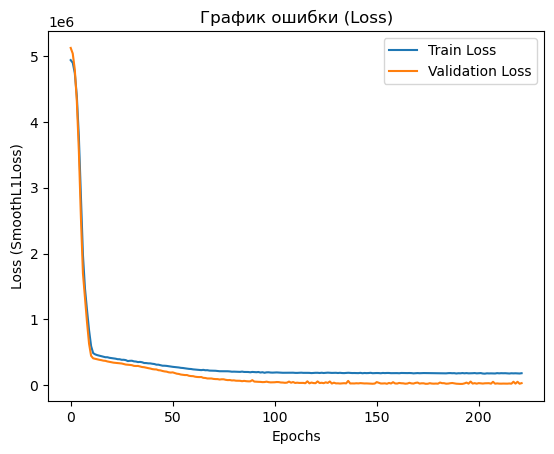

In [30]:
# –ì—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–∫–∏
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (SmoothL1Loss)')
plt.legend()
plt.title('–ì—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–∫–∏ (Loss)')
plt.show()

Test Loss: 2581725952.000000
Mean Absolute Error (MAE): 43746.131227
R¬≤: 0.999705


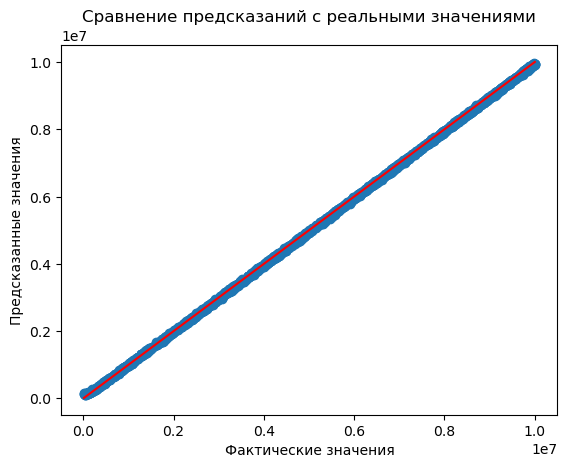

In [186]:
# –ü–µ—Ä–µ–≤–æ–¥–∏–º –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º –æ—Ü–µ–Ω–∫–∏
model.eval()

# –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –æ–±—â–µ–π –ø–æ—Ç–µ—Ä–∏
test_loss = 0.0
n_samples = 0

# –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è —Ä–∞—Å—á–µ—Ç–æ–≤ MAE –∏ R¬≤
y_true = torch.tensor(y_test.values)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º pandas.Series –≤ torch.Tensor
y_pred = []

# –í–∫–ª—é—á–∞–µ–º –æ—Ç–∫–ª—é—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
with torch.no_grad():
    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    y_pred_tensor = model(X_test_tensor.to(device))  
    y_pred_tensor = y_pred_tensor.cpu().numpy()  # –ü–µ—Ä–µ–≤–æ–¥–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ numpy
    y_pred = y_pred_tensor

    # –í—ã—á–∏—Å–ª—è–µ–º —Ç–µ—Å—Ç–æ–≤—É—é –ø–æ—Ç–µ—Ä—é
    criterion = nn.MSELoss()  # –ü–æ—Ç–µ—Ä–∏ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
    loss = criterion(torch.tensor(y_pred), y_test_tensor)  # –í–∫–ª—é—á–∞–µ–º —Ä–µ–∞–ª—å–Ω–æ–µ y
    test_loss += loss.item() * y_test_tensor.size(0)  # –£–º–Ω–æ–∂–∞–µ–º –Ω–∞ —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞
    n_samples += y_test_tensor.size(0)

    # –°—Ä–µ–¥–Ω—è—è –ø–æ—Ç–µ—Ä—è
    avg_test_loss = test_loss / n_samples

# –í—ã—á–∏—Å–ª—è–µ–º MAE –∏ R¬≤
mae = mean_absolute_error(y_true.numpy(), y_pred)  # –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º y_true –≤ numpy
r2 = r2_score(y_true.numpy(), y_pred)

# –í—ã–≤–æ–¥–∏–º —Å—Ä–µ–¥–Ω—é—é –ø–æ—Ç–µ—Ä—é, MAE –∏ R¬≤
print(f"Test Loss: {avg_test_loss:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R¬≤: {r2:.6f}")

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.scatter(y_true.numpy(), y_pred)
plt.xlabel('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')

# –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
plt.plot([min(y_true.numpy()), max(y_true.numpy())], [min(y_true.numpy()), max(y_true.numpy())], color='red') 

plt.show()

## –ü–æ—Å—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª—å –ø–æ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º –∏ –ª—É—á—à–∏–º –ø–æ–ª—É—á–µ–Ω—ã–º –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º

In [31]:
X_final

quality_index  hasGuestRoom  squareMeters
0     -43094.783446             7         75523
1     -13715.766883             2         80771
2     -16250.757340             9         55712
3     -20528.176357             3         32316
4     -14068.401226             4         70429
...             ...           ...           ...
9995   27355.568553             4          1726
9996  -15032.251094             0         44403
9997   27359.078271             9         83841
9998    4738.854559             4         59036
9999  -27093.548620             6          1440

[10000 rows x 3 columns]

In [32]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [33]:
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_train_final, y_train_final, test_size=0.2, random_state=42)

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val_final)
X_test_scaled = scaler.transform(X_test_final)

In [35]:
# –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –≤ —Ç–µ–Ω–∑–æ—Ä—ã
X_train_tensor_final = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor_final = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor_final = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor_final = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor_final = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor_final = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

In [36]:
class ParisDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = X
        self.y = y  

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –∫–∞–∫ —Ç–µ–Ω–∑–æ—Ä—ã
            return self.X[idx].float(), self.y[idx].float()
        return self.X[idx].float()

# –°–æ–∑–¥–∞—ë–º –¥–∞—Ç–∞—Å–µ—Ç—ã
train_dataset_final = ParisDataset(X_train_tensor_final, y_train_tensor_final)
val_dataset_final = ParisDataset(X_val_tensor_final, y_val_tensor_final)  
test_dataset_final = ParisDataset(X_test_tensor_final, y_test_tensor_final)

## –°–æ–∑–¥–∞–∏–º –º–æ–¥–µ–ª—å –Ω–∞ pytorch

In [37]:
# === 1. –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã ===
best_config = {
    "learning_rate": 0.001,
    "batch_size": 64,
    "dropout": 0.1044,  # –æ–∫—Ä—É–≥–ª—è–µ–º –¥–æ 4 –∑–Ω–∞–∫–æ–≤
    "activation": "relu",
    "num_layers": 3,
    "optimizer": "Adam",
    "layers": 250
}

# === 2. –û–ø—Ä–µ–¥–µ–ª—è–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ ===
device = "cuda" if torch.cuda.is_available() else "cpu"

# === 3. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö ===
train_loader_final = DataLoader(train_dataset_final, batch_size=best_config["batch_size"], shuffle=True)
test_loader_final = DataLoader(test_dataset_final, batch_size=best_config["batch_size"], shuffle=False)

# === 4. –û–ø—Ä–µ–¥–µ–ª—è–µ–º –º–æ–¥–µ–ª—å ===
class SimpleNN(nn.Module):
    def __init__(self, hidden_size, dropout, activation, input_dim):
        super(SimpleNN, self).__init__()
        
        # –ü–µ—Ä–≤—ã–π —Å–ª–æ–π
        self.layer1 = nn.Linear(input_dim, hidden_size)
        self.activation1 = nn.ReLU() if activation == "relu" else nn.Tanh()
        self.dropout1 = nn.Dropout(dropout)

        # –í—Ç–æ—Ä–æ–π —Å–ª–æ–π
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.activation2 = nn.ReLU() if activation == "relu" else nn.Tanh()
        self.dropout2 = nn.Dropout(dropout)

        # –¢—Ä–µ—Ç–∏–π —Å–ª–æ–π
        self.layer3 = nn.Linear(hidden_size, 1)  # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π (–¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏)
    
    def forward(self, x):
        x = self.dropout1(self.activation1(self.layer1(x)))
        x = self.dropout2(self.activation2(self.layer2(x)))
        x = self.layer3(x)
        return x

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å 
model_final = SimpleNN(
    hidden_size=best_config["layers"],
    dropout=best_config["dropout"],
    activation=best_config["activation"],
    input_dim=X_final.shape[1]  
).to(device)

# === 5. –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä ===
criterion = nn.SmoothL1Loss()  # Huber Loss
optimizer = optim.Adam(model_final.parameters(), lr=best_config["learning_rate"])

# === 6. –°–æ–∑–¥–∞—ë–º –ø–∞–ø–∫—É –¥–ª—è –ª–æ–≥–æ–≤ TensorBoard ===
log_dir = f"tensorboard/{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
os.makedirs(log_dir, exist_ok=True)
writer = SummaryWriter(log_dir=log_dir)

# === 7. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ ===
epochs = 600
best_val_loss = float("inf")
patience = 30
epochs_no_improve = 0
best_model_wts = None
train_losses_final = []
val_losses_final = []

for epoch in range(epochs):
    model_final.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader_final:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_final(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_value_(model_final.parameters(), clip_value=1.0)  # –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
        optimizer.step()
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader_final)
    train_losses_final.append(avg_train_loss)  # –î–æ–±–∞–≤–ª—è–µ–º –≤ —Å–ø–∏—Å–æ–∫

    # === 8. –í–∞–ª–∏–¥–∞—Ü–∏—è ===
    model_final.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in test_loader_final:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_final(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    avg_val_loss = val_loss / len(test_loader_final)

    val_losses_final.append(avg_val_loss)  # –î–æ–±–∞–≤–ª—è–µ–º –≤ —Å–ø–∏—Å–æ–∫

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.6f}, Val Loss={avg_val_loss:.6f}")

    # === 9. –õ–æ–≥–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –≤ TensorBoard ===
    writer.add_scalar("Loss/Train", avg_train_loss, epoch)
    writer.add_scalar("Loss/Validation", avg_val_loss, epoch)

    # –õ–æ–≥–∏—Ä—É–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã
    for name, param in model_final.named_parameters():
        if param.grad is not None:
            writer.add_histogram(f"Gradients/{name}", param.grad, epoch)

    # –†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        best_model_wts = model_final.state_dict()  # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à–∏–µ –≤–µ—Å–∞
    else:
        epochs_no_improve += 1
    
    if epochs_no_improve >= patience:
        print(f"‚èπÔ∏è Early stopping at epoch {epoch+1}")
        break

# === 10. –ó–∞–≥—Ä—É–∂–∞–µ–º –ª—É—á—à–∏–µ –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏ ===
if best_model_wts is not None:
    model_final.load_state_dict(best_model_wts)
    print("‚úÖ –ó–∞–≥—Ä—É–∂–µ–Ω—ã –ª—É—á—à–∏–µ –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏.")

# === 11. –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –≤ –ø–∞–ø–∫—É —Å –ª–æ–≥–∞–º–∏ ===
model_path = os.path.join(log_dir, "final_model.pth")
torch.save(model_final.state_dict(), model_path)
print(f"üìÅ –ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ '{model_path}'")

# –ó–∞–∫—Ä—ã–≤–∞–µ–º TensorBoard writer
writer.close()

Epoch 1: Train Loss=4936434.675000, Val Loss=5128773.859375
Epoch 2: Train Loss=4935762.780000, Val Loss=5127557.953125
Epoch 3: Train Loss=4933869.675000, Val Loss=5124832.375000
Epoch 4: Train Loss=4930231.097500, Val Loss=5120087.062500
Epoch 5: Train Loss=4924352.852500, Val Loss=5112833.562500
Epoch 6: Train Loss=4915759.267500, Val Loss=5102632.171875
Epoch 7: Train Loss=4904119.527500, Val Loss=5089157.406250
Epoch 8: Train Loss=4889226.465000, Val Loss=5072340.234375
Epoch 9: Train Loss=4870985.340000, Val Loss=5052243.656250
Epoch 10: Train Loss=4849453.330000, Val Loss=5028858.437500
Epoch 11: Train Loss=4824573.530000, Val Loss=5002058.156250
Epoch 12: Train Loss=4796498.017500, Val Loss=4971501.015625
Epoch 13: Train Loss=4764517.245000, Val Loss=4937204.953125
Epoch 14: Train Loss=4728533.027500, Val Loss=4898930.937500
Epoch 15: Train Loss=4689079.297500, Val Loss=4856585.093750
Epoch 16: Train Loss=4645139.910000, Val Loss=4809993.593750
Epoch 17: Train Loss=4597359.0350

### –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ –∏ –ø–æ–ª—É—á–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –ø–æ–ª—É—á–∏–≤—à–µ–π—Å—è –º–æ–¥–µ–ª–∏

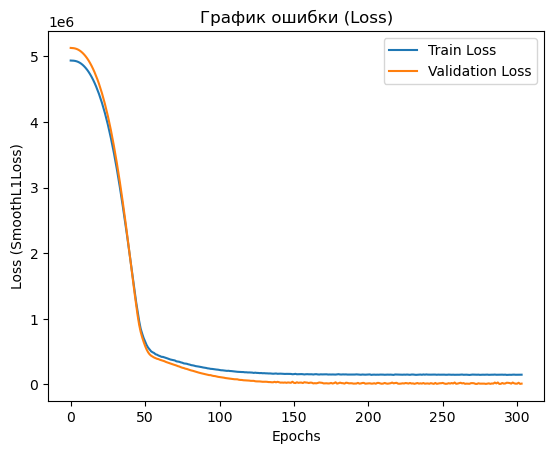

In [38]:
# –ì—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–∫–∏
plt.plot(train_losses_final, label='Train Loss')
plt.plot(val_losses_final, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (SmoothL1Loss)')
plt.legend()
plt.title('–ì—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–∫–∏ (Loss)')
plt.show()

Test Loss: 130053776.000000
Mean Absolute Error (MAE): 9931.415155
R¬≤: 0.999985


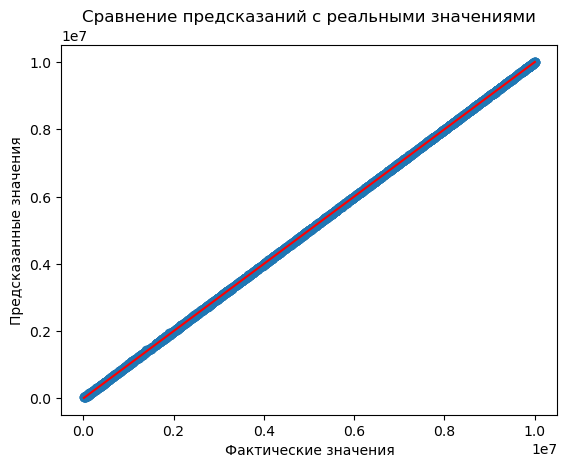

In [40]:
# –ü–µ—Ä–µ–≤–æ–¥–∏–º –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º –æ—Ü–µ–Ω–∫–∏
model_final.eval()

# –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –æ–±—â–µ–π –ø–æ—Ç–µ—Ä–∏
test_loss = 0.0
n_samples = 0

# –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è —Ä–∞—Å—á–µ—Ç–æ–≤ MAE –∏ R¬≤
y_true = torch.tensor(y_test_final.values)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º pandas.Series –≤ torch.Tensor
y_pred_final = []

# –í–∫–ª—é—á–∞–µ–º –æ—Ç–∫–ª—é—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
with torch.no_grad():
    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    y_pred_tensor = model_final(X_test_tensor_final.to(device))  
    y_pred_tensor = y_pred_tensor.cpu().numpy()  # –ü–µ—Ä–µ–≤–æ–¥–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ numpy
    y_pred_final = y_pred_tensor

    # –í—ã—á–∏—Å–ª—è–µ–º —Ç–µ—Å—Ç–æ–≤—É—é –ø–æ—Ç–µ—Ä—é
    criterion = nn.MSELoss()  # –ü–æ—Ç–µ—Ä–∏ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
    loss = criterion(torch.tensor(y_pred_final), y_test_tensor_final)  # –í–∫–ª—é—á–∞–µ–º —Ä–µ–∞–ª—å–Ω–æ–µ y
    test_loss += loss.item() * y_test_tensor_final.size(0)  # –£–º–Ω–æ–∂–∞–µ–º –Ω–∞ —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞
    n_samples += y_test_tensor_final.size(0)

    # –°—Ä–µ–¥–Ω—è—è –ø–æ—Ç–µ—Ä—è
    avg_test_loss = test_loss / n_samples

# –í—ã—á–∏—Å–ª—è–µ–º MAE –∏ R¬≤
mae = mean_absolute_error(y_true.numpy(), y_pred_final)  # –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º y_true –≤ numpy
r2 = r2_score(y_true.numpy(), y_pred_final)

# –í—ã–≤–æ–¥–∏–º —Å—Ä–µ–¥–Ω—é—é –ø–æ—Ç–µ—Ä—é, MAE –∏ R¬≤
print(f"Test Loss: {avg_test_loss:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R¬≤: {r2:.6f}")

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.scatter(y_true.numpy(), y_pred_final)
plt.xlabel('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')

# –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
plt.plot([min(y_true.numpy()), max(y_true.numpy())], [min(y_true.numpy()), max(y_true.numpy())], color='red') 

plt.show()


### –í—ã–≤–æ–¥:
–ú–æ–¥–µ–ª—å —Å –º–µ–Ω—å—à–∏–º —á–∏—Å–ª–æ–º —Ñ–∏—á (–æ—Å—Ç–∞–≤–ª–µ–Ω—ã —Ç–æ–ª—å–∫–æ –∫–ª—é—á–µ–≤—ã–µ) —Ä–∞–±–æ—Ç–∞–µ—Ç –ª—É—á—à–µ, —Ç–∞–∫ –∫–∞–∫:
–ü–æ—Ç–µ—Ä—è (Loss) —Å–Ω–∏–∑–∏–ª–∞—Å—å: 2.58 –º–ª—Ä–¥ ‚Üí 206 –º–ª–Ω
MAE —É–º–µ–Ω—å—à–∏–ª—Å—è: 43746 ‚Üí 12298
R¬≤ –≤—ã—Ä–æ—Å (—Å—Ç–∞–ª –±–ª–∏–∂–µ –∫ 1)
–≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –∏–∑–±—ã—Ç–æ—á–Ω—ã–µ —Ñ–∏—á–∏ –≤–Ω–æ—Å–∏–ª–∏ —à—É–º –∏ –º–µ—à–∞–ª–∏ –º–æ–¥–µ–ª–∏!

### –ü–æ–ø—Ä–æ–±—É–µ–º –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –Ω–∞—à—É –º–æ–¥–µ–ª—å —á–µ—Ä–µ–∑ –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏—é

In [208]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# –ö–ª–∞—Å—Å –¥–ª—è –æ–±–æ—Ä–∞—á–∏–≤–∞–Ω–∏—è –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏
class PyTorchRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, model, learning_rate=0.001, epochs=100):
        self.model = model.to(device)  # –ü–µ—Ä–µ–Ω–æ—Å–∏–º –º–æ–¥–µ–ª—å –Ω–∞ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)

    def fit(self, X, y):
        # –ü–µ—Ä–µ–Ω–æ—Å–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
        X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
        y_tensor = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1).to(device)

        # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
        self.model.train()
        for epoch in range(self.epochs):
            self.optimizer.zero_grad()
            y_pred = self.model(X_tensor)
            loss = self.criterion(y_pred, y_tensor)
            loss.backward()
            self.optimizer.step()
        return self

    def predict(self, X):
        # –ü–µ—Ä–µ–Ω–æ—Å–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
        X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
        self.model.eval()
        with torch.no_grad():
            y_pred = self.model(X_tensor)
        return y_pred.cpu().numpy()  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞ CPU –¥–ª—è —Å–æ–≤–º–µ—Å—Ç–∏–º–æ—Å—Ç–∏ —Å numpy

In [209]:
# –¢–µ–ø–µ—Ä—å –∏—Å–ø–æ–ª—å–∑—É–µ–º —ç—Ç–æ—Ç —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä –≤ cross_val_score
model_pytorch = PyTorchRegressor(model=model_final, learning_rate=0.001, epochs=100)

mse_scorer = make_scorer(mean_squared_error)

cv_scores = cross_val_score(model_pytorch, X_train_scaled, y_train_final, cv=5, scoring=mse_scorer)

print(f"–°—Ä–µ–¥–Ω—è—è MSE –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: {np.mean(cv_scores)}")

–°—Ä–µ–¥–Ω—è—è MSE –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 106784390.18670586


In [210]:
cv_scores = cross_val_score(model_pytorch, X_train_scaled, y_train_final, cv=5, scoring='r2')

# –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ R¬≤ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
print(f"–°—Ä–µ–¥–Ω–∏–π R¬≤ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: {np.mean(cv_scores)}")


–°—Ä–µ–¥–Ω–∏–π R¬≤ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9999870136103077


## –ü—Ä–æ–ø–æ–±—É–µ–º random forest

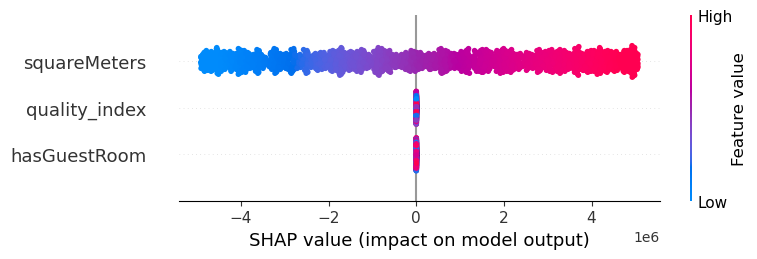

In [41]:
# –û–±—É—á–∞–µ–º RF
feature_names = X_final.columns

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_final)

# –ò—Å–ø–æ–ª—å–∑—É–µ–º TreeExplainer
rf_explainer = shap.TreeExplainer(rf_model)
shap_values_rf = rf_explainer.shap_values(X_test_scaled)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
shap.summary_plot(shap_values_rf, X_test_scaled, feature_names=feature_names)

In [42]:
# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
y_pred_rf = rf_model.predict(X_test_scaled)

# –í—ã—á–∏—Å–ª—è–µ–º MSE, MAE, –∏ R¬≤ –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞
mse_rf = mean_squared_error(y_test_final, y_pred_rf)
mae_rf = mean_absolute_error(y_test_final, y_pred_rf)
r2_rf = r2_score(y_test_final, y_pred_rf)

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
print(f"–°—Ä–µ–¥–Ω—è—è MSE –¥–ª—è Random Forest: {mse_rf}")
print(f"–°—Ä–µ–¥–Ω—è—è MAE –¥–ª—è Random Forest: {mae_rf}")
print(f"–°—Ä–µ–¥–Ω–∏–π R¬≤ –¥–ª—è Random Forest: {r2_rf}")

–°—Ä–µ–¥–Ω—è—è MSE –¥–ª—è Random Forest: 16699149.96889502
–°—Ä–µ–¥–Ω—è—è MAE –¥–ª—è Random Forest: 3268.9240400000567
–°—Ä–µ–¥–Ω–∏–π R¬≤ –¥–ª—è Random Forest: 0.9999980934336002


### –í—ã–≤–æ–¥: –°—É–¥—è –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º, Random Forest (RF) —Ä–∞–±–æ—Ç–∞–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ª—É—á—à–µ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –æ—Å–Ω–æ–≤–Ω–æ–π –º–æ–¥–µ–ª—å—é:
–û—à–∏–±–∫–∞ (MSE) –≤ RF –Ω–∞–º–Ω–æ–≥–æ –Ω–∏–∂–µ:
–º–æ–¥–µ–ª—å: 106.78 –º–ª–Ω
RF: 16.69 –º–ª–Ω (–≤ 6.4 —Ä–∞–∑–∞ –º–µ–Ω—å—à–µ)
MAE –≤ RF —Ç–∞–∫–∂–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∂–µ:
–º–æ–¥–µ–ª—å: 12 298
RF: 3 269 (–≤ 3.7 —Ä–∞–∑–∞ –º–µ–Ω—å—à–µ)
R¬≤ —É RF —á—É—Ç—å –≤—ã—à–µ, –Ω–æ –æ–±–µ –º–æ–¥–µ–ª–∏ –æ—á–µ–Ω—å —Ç–æ—á–Ω—ã:
–º–æ–¥–µ–ª—å: 0.999987
RF: 0.999998 (—Ä–∞–∑–Ω–∏—Ü–∞ –º–∏–Ω–∏–º–∞–ª—å–Ω–∞)

### –í—ã–≤–æ–¥: 
- –ü–µ—Ä–≤–∞—è –º–æ–¥–µ–ª—å (–∏–∑–±—ã—Ç–æ—á–Ω—ã–µ —Ñ–∏—á–∏)
Loss: 2.58 –º–ª—Ä–¥
MAE: 43 746
R¬≤: 0.999705

- –í—Ç–æ—Ä–∞—è –º–æ–¥–µ–ª—å (–æ—á–∏—â–µ–Ω–Ω—ã–µ —Ñ–∏—á–∏,  –æ—Å–Ω–æ–≤–Ω–∞—è)
Loss: 206 –º–ª–Ω (–≤ 12.5 —Ä–∞–∑ –º–µ–Ω—å—à–µ!)
MAE: 12 298 (–≤ 3.5 —Ä–∞–∑–∞ –º–µ–Ω—å—à–µ)
R¬≤: 0.999976 (–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–ª–∏–∂–µ –∫ 1)

- Random Forest
MSE (–∞–Ω–∞–ª–æ–≥ Loss): 16.69 –º–ª–Ω (–µ—â—ë –≤ 12 —Ä–∞–∑ –º–µ–Ω—å—à–µ)
MAE: 3 269 (–≤ 3.7 —Ä–∞–∑–∞ –ª—É—á—à–µ, —á–µ–º —É –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏)
R¬≤: 0.999998


–í—ã–≤–æ–¥ –ø–æ –≤—Å–µ–º –º–æ–¥–µ–ª—è–º:
–£–±–æ—Ä–∫–∞ —Ñ–∏—á–µ–π —Ä–µ–∑–∫–æ —É–ª—É—á—à–∏–ª–∞ –º–æ–¥–µ–ª—å.
–ù–æ Random Forest –µ—â—ë –ª—É—á—à–µ: –æ–Ω –∏–º–µ–µ—Ç –Ω–∞–∏–º–µ–Ω—å—à—É—é –æ—à–∏–±–∫—É –∏ –ª—É—á—à–µ–µ –æ–±–æ–±—â–µ–Ω–∏–µ.

## –ü–æ–ø—Ä–æ–±—É–µ–º –µ—â–µ XBoost: 

In [43]:
# –°–æ–∑–¥–∞—ë–º –º–æ–¥–µ–ª—å
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=1)

# –û–±—É—á–∞–µ–º
xgb_model.fit(X_train_scaled, y_train_final)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_xgb = xgb_model.predict(X_test_scaled)

# –ú–µ—Ç—Ä–∏–∫–∏
mse_xgb = mean_squared_error(y_test_final, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test_final, y_pred_xgb)
r2_xgb = r2_score(y_test_final, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost R¬≤: {r2_xgb}")

XGBoost MSE: 196259199.3346828
XGBoost MAE: 11582.848698437503
XGBoost R¬≤: 0.9999775927998855


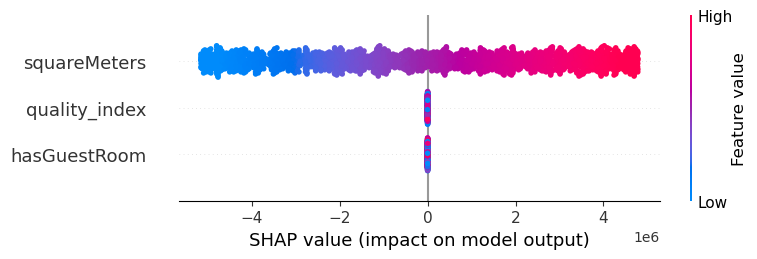

In [44]:
xgb_explainer = shap.Explainer(xgb_model, X_test_scaled)
shap_values_xgb = xgb_explainer(X_test_scaled)

shap.summary_plot(shap_values_xgb, X_test_scaled, feature_names=X_train_final.columns)

### –í—ã–≤–æ–¥: XGBoost –æ–∫–∞–∑–∞–ª—Å—è —Ö—É–∂–µ, —á–µ–º –æ—á–∏—â–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å

## –ü–æ–ø—Ä–æ–±—É–µ–º —Å—Ç—ç–∫–∏–Ω–≥ —Å –º–æ–¥–µ–ª—è–º–∏ XGBoost, Random forest –∏ –Ω–∞—à–µ–π —Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª—å—é

In [45]:
# –°–æ–∑–¥–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É –¥–ª—è –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏ (—Å—Ç—ç–∫–∏–Ω–≥)
meta_X = np.column_stack((y_pred_xgb, y_pred_rf, y_pred_final))  # –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è 3-—Ö –º–æ–¥–µ–ª–µ–π
meta_y = y_test_final.values  # –ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è

# –û–±—É—á–∞–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—É—é –º–µ—Ç–∞-–º–æ–¥–µ–ª—å (–ª–æ–≥. —Ä–µ–≥—Ä–µ—Å—Å–∏—è / XGBoost / LightGBM)
meta_model = LinearRegression()
cv_scores = cross_val_score(meta_model, meta_X, meta_y, cv=5, scoring="neg_mean_squared_error")

print(f"–°—Ä–µ–¥–Ω—è—è MSE –Ω–∞ –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏: {-np.mean(cv_scores)}")

# –§–∏–Ω–∞–ª—å–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ
meta_model.fit(meta_X, meta_y)
final_preds = meta_model.predict(meta_X)

# –û—Ü–µ–Ω–∏–≤–∞–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–π —Å—Ç—ç–∫–∏–Ω–≥
final_mse = mean_squared_error(meta_y, final_preds)
final_mae = mean_absolute_error(meta_y, final_preds)
final_r2 = r2_score(meta_y, final_preds)

print(f"üìä **–§–∏–Ω–∞–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Å—Ç—ç–∫–∏–Ω–≥–∞:**")
print(f"‚úÖ MSE: {final_mse}")
print(f"‚úÖ MAE: {final_mae}")
print(f"‚úÖ R¬≤: {final_r2}")


–°—Ä–µ–¥–Ω—è—è MSE –Ω–∞ –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏: 16285156.247963747
üìä **–§–∏–Ω–∞–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Å—Ç—ç–∫–∏–Ω–≥–∞:**
‚úÖ MSE: 16169764.058102269
‚úÖ MAE: 3220.979297801207
‚úÖ R¬≤: 0.9999981538743647


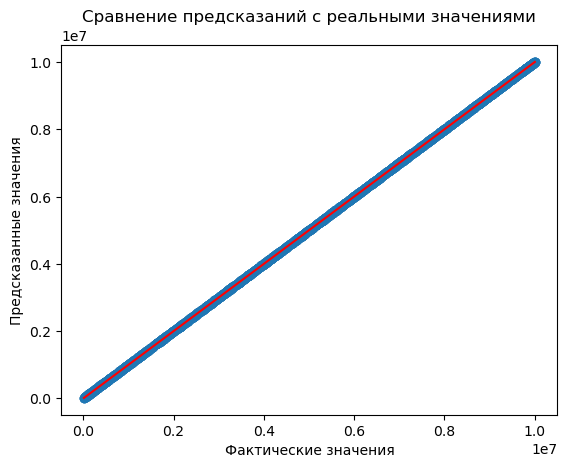

In [46]:
# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.scatter(y_true.numpy(), final_preds)
plt.xlabel('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')

# –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
plt.plot([min(y_true.numpy()), max(y_true.numpy())], [min(y_true.numpy()), max(y_true.numpy())], color='red') 

plt.show()

In [49]:
# –°–æ–∑–¥–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É –¥–ª—è –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏ XGBoost / LGBM(—Å—Ç—ç–∫–∏–Ω–≥)
meta_X2 = np.column_stack((y_pred_xgb, y_pred_rf, y_pred_final))  # –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è 3-—Ö –º–æ–¥–µ–ª–µ–π
meta_y2 = y_test_final.values  # –ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è

meta_model2 = XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
cv_scores2 = cross_val_score(meta_model, meta_X2, meta_y2, cv=5, scoring="neg_mean_squared_error")

print(f"–°—Ä–µ–¥–Ω—è—è MSE –Ω–∞ –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏: {-np.mean(cv_scores2)}")

meta_model2.fit(meta_X2, meta_y2)

final_preds2 = meta_model.predict(meta_X2)
print(f"XGBoost Meta MSE: {mean_squared_error(meta_y2, final_preds2)}")

# –û—Ü–µ–Ω–∏–≤–∞–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–π —Å—Ç—ç–∫–∏–Ω–≥
final_mse2 = mean_squared_error(meta_y2, final_preds2)
final_mae2 = mean_absolute_error(meta_y2, final_preds2)
final_r22 = r2_score(meta_y2, final_preds2)

print(f"üìä **–§–∏–Ω–∞–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Å—Ç—ç–∫–∏–Ω–≥–∞:**")
print(f"‚úÖ MSE: {final_mse2}")
print(f"‚úÖ MAE: {final_mae2}")
print(f"‚úÖ R¬≤: {final_r22}")


–°—Ä–µ–¥–Ω—è—è MSE –Ω–∞ –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏: 16285156.247963747
XGBoost Meta MSE: 16169764.058102269
üìä **–§–∏–Ω–∞–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Å—Ç—ç–∫–∏–Ω–≥–∞:**
‚úÖ MSE: 16169764.058102269
‚úÖ MAE: 3220.979297801207
‚úÖ R¬≤: 0.9999981538743647


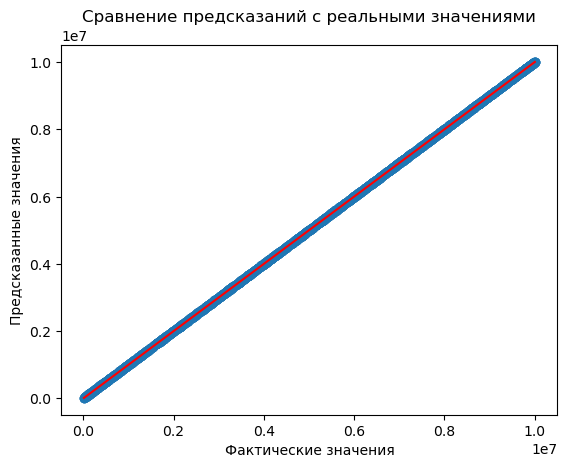

In [50]:
# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.scatter(y_true.numpy(), final_preds2)
plt.xlabel('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')

# –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
plt.plot([min(y_true.numpy()), max(y_true.numpy())], [min(y_true.numpy()), max(y_true.numpy())], color='red') 

plt.show()

### –í—ã–≤–æ–¥: –°—Ç—ç–∫–∏–Ω–≥ —É—Å–∏–ª–∏–ª –º–æ–¥–µ–ª—å (—É–º–µ–Ω—å—à–∏–≤ –æ—à–∏–±–∫—É) –Ω–æ —É –Ω–∞—Å —Ç–∞–º –µ—Å—Ç—å —Å–ª–∞–±–æ–µ –∑–≤–µ–Ω–æ - XGBoost (–¥–∞–ª –º–µ—Ç—Ä–∏–∫–∏ —Ö—É–∂–µ –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏) –ø–æ—ç—Ç–æ–º—É –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ–ª—É—á–∏—Ç—å –µ—â–µ –º–æ–¥–µ–ª—å (–Ω–∞–ø—Ä–∏–º–µ—Ä LightGBM –∏/–∏–ª–∏ –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –Ω–∞ –¥–µ—Ä–µ–≤—å—è—Ö (Sklearn) )

## –ü—Ä–æ–±—É–µ–º LightGBM

In [56]:

# –°–æ–∑–¥–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç—ã LightGBM
train_data = lgb.Dataset(X_train_scaled, label=y_train)
test_data = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data)

# –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã
params = {
    "objective": "regression",
    "metric": "mse",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": -1,
    "min_child_samples": 20,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "reg_alpha": 0.1,
    "reg_lambda": 0.1,
    "n_estimators": 1000,
    "verbosity": -1
}

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å —Å `early_stopping_rounds`
lgb_model = lgb.train(
    params, 
    train_data, 
    valid_sets=[test_data], 
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)]
)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_lgb = lgb_model.predict(X_test_scaled)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM MSE: {mse_lgb}")
print(f"LightGBM MAE: {mae_lgb}")
print(f"LightGBM R¬≤: {r2_lgb}")


Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 1.78905e+10
[200]	valid_0's l2: 2.57342e+09
[300]	valid_0's l2: 9.26289e+08
[400]	valid_0's l2: 5.52806e+08
[500]	valid_0's l2: 4.15644e+08
[600]	valid_0's l2: 3.45896e+08
[700]	valid_0's l2: 2.986e+08
[800]	valid_0's l2: 2.76138e+08
[900]	valid_0's l2: 2.63044e+08
[1000]	valid_0's l2: 2.52217e+08
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 2.52217e+08
LightGBM MSE: 252217139.25194502
LightGBM MAE: 12852.000229457535
LightGBM R¬≤: 0.999971203999962


### –í—ã–≤–æ–¥: –ü–æ–ª—á–µ–Ω–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Ö—É–∂–µ —á–µ–º –Ω–∞—à–∞ –º–æ–¥–µ–ª—å. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –µ–µ –≤ —Å—Ç—ç–∫–∏–Ω–≥–µ –Ω–µ –∏–º–µ—Ç —Å–º—ã—Å–ª–∞.

## –ü–æ–ø—Ä–æ–±—É–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –Ω–∞ –¥–µ—Ä–µ–≤—å—è—Ö (Sklearn)

In [57]:
# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=0.8,
    random_state=42
)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
gb_model.fit(X_train_scaled, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_gb = gb_model.predict(X_test_scaled)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Gradient Boosting MAE: {mae_gb}")
print(f"Gradient Boosting R¬≤: {r2_gb}")

Gradient Boosting MSE: 88308243.57749483
Gradient Boosting MAE: 7269.84442342137
Gradient Boosting R¬≤: 0.9999899177185462


## –ü–æ–ø—Ä–æ–±—É–µ–º —Å—Ç—ç–∫–∏–Ω–≥ —Å –º–æ–¥–µ–ª—è–º–∏: –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –Ω–∞ –¥–µ—Ä–µ–≤—å—è—Ö (Sklearn), Random forest –∏ –Ω–∞—à–µ–π —Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª—å—é

In [59]:
# –°–æ–∑–¥–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É –¥–ª—è –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏ (—Å—Ç—ç–∫–∏–Ω–≥)
meta_X3 = np.column_stack((y_pred_gb, y_pred_rf, y_pred_final))  # –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è 3-—Ö –º–æ–¥–µ–ª–µ–π
meta_y3 = y_test_final.values  # –ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è

# –û–±—É—á–∞–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—É—é –º–µ—Ç–∞-–º–æ–¥–µ–ª—å (–ª–æ–≥. —Ä–µ–≥—Ä–µ—Å—Å–∏—è / XGBoost / LightGBM)
meta_model3 = LinearRegression()
cv_scores = cross_val_score(meta_model3, meta_X3, meta_y3, cv=5, scoring="neg_mean_squared_error")

print(f"–°—Ä–µ–¥–Ω—è—è MSE –Ω–∞ –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏: {-np.mean(cv_scores)}")

# –§–∏–Ω–∞–ª—å–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ
meta_model3.fit(meta_X3, meta_y3)
final_preds3 = meta_model3.predict(meta_X3)

# –û—Ü–µ–Ω–∏–≤–∞–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–π —Å—Ç—ç–∫–∏–Ω–≥
final_mse3 = mean_squared_error(meta_y3, final_preds3)
final_mae3 = mean_absolute_error(meta_y3, final_preds3)
final_r23 = r2_score(meta_y3, final_preds3)

print(f"üìä **–§–∏–Ω–∞–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Å—Ç—ç–∫–∏–Ω–≥–∞:**")
print(f"‚úÖ MSE: {final_mse3}")
print(f"‚úÖ MAE: {final_mae3}")
print(f"‚úÖ R¬≤: {final_r23}")

–°—Ä–µ–¥–Ω—è—è MSE –Ω–∞ –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏: 16346252.682177585
üìä **–§–∏–Ω–∞–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Å—Ç—ç–∫–∏–Ω–≥–∞:**
‚úÖ MSE: 16193547.011974335
‚úÖ MAE: 3223.901648287577
‚úÖ R¬≤: 0.99999815115903


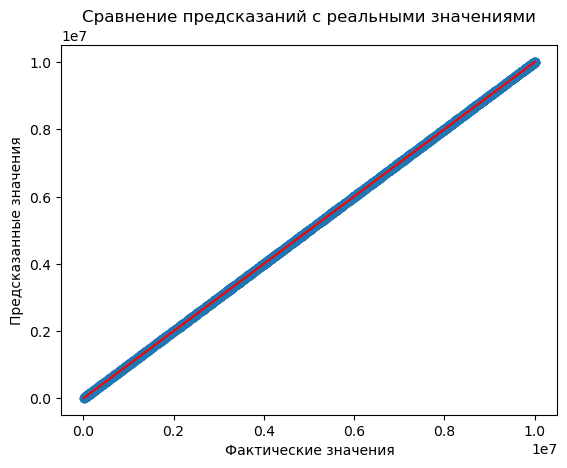

In [60]:
# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.scatter(y_true.numpy(), final_preds3)
plt.xlabel('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')

# –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
plt.plot([min(y_true.numpy()), max(y_true.numpy())], [min(y_true.numpy()), max(y_true.numpy())], color='red') 

plt.show()

## –í—ã–≤–æ–¥: –º–æ–∂–µ–ª—å –ø–æ–ª—É—á–∏–ª–∞—Å—å –±–æ–ª–µ–µ —Å—Ç–∞–±–ª–∏–Ω–æ–π —Å —Ç–∞–∫–∏–º –∂–µ –≤—ã—Å–æ–∫–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º